In [68]:
import pandas as pd

df = pd.read_csv("reviews.csv",delimiter=',', encoding='ISO-8859-1')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ï»¿textID  3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
 3   time       3534 non-null   object
 4   age        3534 non-null   object
 5   country    3534 non-null   object
dtypes: object(6)
memory usage: 165.8+ KB


In [70]:
df.drop('Unnamed: 6')

KeyError: "['Unnamed: 6'] not found in axis"

In [71]:
df.isnull().sum()

ï»¿textID    0
text         0
sentiment    0
time         0
age          0
country      0
dtype: int64

In [72]:
df['sentiment'] = df['sentiment'].replace({4:1})

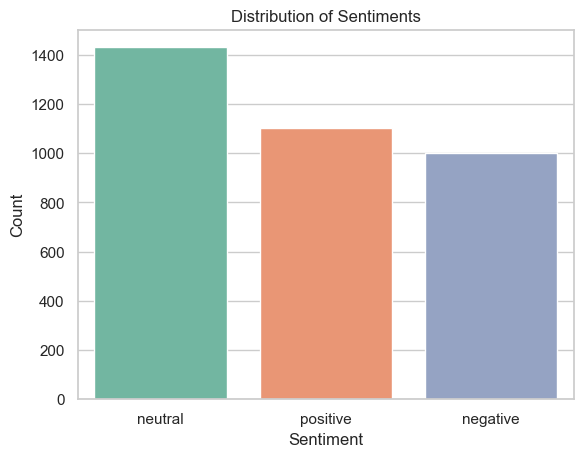

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") 

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')

# Customize plot labels and title if needed
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

In [74]:
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
df = df[['sentiment','text']]
df.head()

,sentiment,text
0,neutral,Last session of the day http://twitpic.com/67ezh
1,positive,Shanghai is also really exciting (precisely -...
2,negative,"Recession hit Veronique Branquinho, she has to..."
3,positive,happy bday!
4,positive,http://twitpic.com/4w75p - I like it!!


In [75]:
def textprocessing(text):
    text = str(text).lower()                                                     
    text = re.sub(r"https\S+|www\S+|https\S+"," ",text,flags=re.MULTILINE)    
    text = re.sub(r'\@\w+|\#'," ",text)                                          
    text = re.sub(r'[^\w\s\`]'," ",text)                                     
    text_tokens = word_tokenize(text) 
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text_tokens if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    
    return text1 

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf

x = df['text']
y = df['sentiment']

vectorizer = tf()
vectors = vectorizer.fit_transform(x)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.3, random_state=52)

In [80]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm

n_components = 100  
svd = TruncatedSVD(n_components=n_components)
X_train_pca = svd.fit_transform(X_train_svm)
X_validation_pca = svd.transform(X_validation_svm)
X_test_pca = svd.transform(X_test_svm)

svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train_pca, y_train)
pred = svm_model.predict(X_test_pca)

In [66]:
report = classification_report(y_test, prediction_linear, output_dict=True)
report

ValueError: Found input variables with inconsistent numbers of samples: [1061, 531]

In [51]:
from sklearn import svm
from sklearn.metrics import classification_report

classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)
prediction_linear = classifier_linear.predict(X_test)

In [52]:
report = classification_report(y_test, prediction_linear, output_dict=True)
report

{'negative': {'precision': 0.6680851063829787,
  'recall': 0.5322033898305085,
  'f1-score': 0.5924528301886792,
  'support': 295.0},
 'neutral': {'precision': 0.5934819897084048,
  'recall': 0.7604395604395604,
  'f1-score': 0.6666666666666666,
  'support': 455.0},
 'positive': {'precision': 0.7695473251028807,
  'recall': 0.6012861736334405,
  'f1-score': 0.6750902527075813,
  'support': 311.0},
 'accuracy': 0.6503298774740811,
 'macro avg': {'precision': 0.6770381403980882,
  'recall': 0.6313097079678365,
  'f1-score': 0.6447365831876424,
  'support': 1061.0},
 'weighted avg': {'precision': 0.6658328273395843,
  'recall': 0.6503298774740811,
  'f1-score': 0.6485014013487761,
  'support': 1061.0}}

In [55]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.3, random_state=52)

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)
prediction_model = knn_model.predict(X_test)

In [57]:
report = classification_report(y_test, prediction_model, output_dict=True)
report

{'negative': {'precision': 0.5577557755775577,
  'recall': 0.5728813559322034,
  'f1-score': 0.5652173913043478,
  'support': 295.0},
 'neutral': {'precision': 0.5670731707317073,
  'recall': 0.6131868131868132,
  'f1-score': 0.5892291446673706,
  'support': 455.0},
 'positive': {'precision': 0.6127819548872181,
  'recall': 0.5241157556270096,
  'f1-score': 0.5649913344887348,
  'support': 311.0},
 'accuracy': 0.5758718190386428,
 'macro avg': {'precision': 0.5792036337321611,
  'recall': 0.5700613082486754,
  'f1-score': 0.573145956820151,
  'support': 1061.0},
 'weighted avg': {'precision': 0.5778807110727909,
  'recall': 0.5758718190386428,
  'f1-score': 0.5754483471106813,
  'support': 1061.0}}